<a href="https://colab.research.google.com/github/SampMark/Deep-Learning/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Convolucionais**

As CNNs (Redes Neurais Convolucionais) são projetadas para processar e analisar dados visuais, imitando o sistema visual humano. Consistem em camadas convolucionais, camadas de pooling e camadas totalmente conectadas. Cada camada tem um papel específico na extração de características e no aprendizado de padrões.

**Modelo Básico de CNN**
* **Camadas convolucionai**s: extraem características das imagens.
* **Camadas de pooling**: reduzem a dimensionalidade dos mapas de características.
* **Camadas totalmente conectadas**: realizam a classificação final.

O código a seguir é uma introdução prática ao aumento de dados usando Keras e Matplotlib. A ideia é aplicar transformações aleatórias a uma imagem e visualizar os resultados. O objetivo é demonstrar como o aumento de dados pode criar variações sintéticas de uma única imagem, o que é útil para treinar modelos de aprendizado de máquina mais robustos.

Essa técnica é fundamental para melhorar a generalização de modelos de aprendizado de máquina, especialmente em tarefas de visão computacional. Com pequenas adaptações, o código pode ser usado em projetos reais para aumentar conjuntos de dados e melhorar o desempenho de modelos.

**Algumas Aplicações Práticas**

* **Treinamento de Redes Neurais**: o aumento de dados é amplamente utilizado para aumentar o tamanho do conjunto de treinamento e evitar overfitting.

* **Visão Computacional**: aplicação em tarefas como classificação de imagens, detecção de objetos e segmentação se beneficiam muito dessa técnica.

* **Experimentos e Visualização**: o código pode ser adaptado para visualizar como diferentes transformações afetam uma imagem, ajudando a entender o impacto de cada parâmetro.

## **Instalando e importando as bibliotecas**

---



In [1]:
!pip install tensorflow

## **Implantando a classe `ImageDataGenerator`**

A classe `ImageDataGenerator` serve para aplicar transformações aleatórias às imagens de treinamento, gerando novas amostras sintéticas que ajudam a melhorar a generalização do modelo.

In [1]:
# Importando bibliotecas necessárias
import tensorflow as tf # Construção e treinamento de modelos de redes neurais
import os
import random
import numpy as np
import matplotlib.pyplot as plt # Plotagem de gráficos e imagens
# Processamento de imagens para modelos de IA
# ImageDataGenerator, para gerar amostras sintéticas e aplicar transformações em imagens
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img # Funções para carregar e converter imagens em arrays NumPy
from keras.utils import load_img, img_to_array
from PIL import Image, ImageDraw, ImageFont, ImageOps  # Manipulação de imagens

## **Criando um `sample.jpg`**

---
Nesta etapa, uma imagem simples é criada usando a biblioteca PIL (Pillow). A imagem é composta por um fundo branco com um retângulo vermelho no centro.


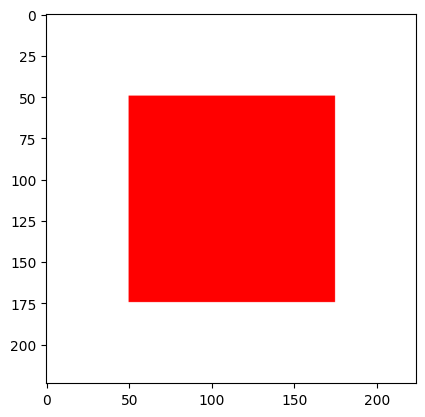

In [2]:
# Cria uma imagem RGB com dimensões 224x224 pixels e cor de fundo branca (255, 255, 255)
image = Image.new('RGB', (224, 224), color=(255, 255, 255))

# Cria um objeto de desenho para modificar a imagem
draw = ImageDraw.Draw(image)

# Desenha um retângulo vermelho (255, 0, 0) na imagem
# As coordenadas [(50, 50), (174, 174)] definem o canto superior esquerdo e o canto inferior direito do retângulo
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Salva a imagem gerada com o nome 'sample.jpg'
image.save('sample.jpg')

# Caminho do arquivo salvo
img_path = 'sample.jpg'

# Carrega a imagem salva no formato compatível com o Keras
img = load_img(img_path)

# Converte a imagem carregada em um array NumPy
x = img_to_array(img)

# Expande as dimensões do array para adicionar um eixo extra na posição 0,
# transformando a imagem de formato (altura, largura, canais) para (1, altura, largura, canais),
# o que é necessário para alimentar modelos de deep learning que esperam lotes (batches) de imagens.
x = np.expand_dims(x, axis=0)

# Exibe a imagem usando matplotlib
plt.imshow(image)
plt.show()

## **Etapa 1: Aplicação de Aumento de Dados (_Data Augmentation_)**
Nesta etapa, serão aplicadas técnicas de aumento de dados para expandir a diversidade do conjunto de imagens, tornando o modelo mais robusto e reduzindo o risco de *overfitting*.

Utilizaremos a classe `ImageDataGenerator` do Keras para realizar transformações básicas, como:

* **Rotação** (`rotation_range`): gira a imagem dentro de um determinado ângulo.
* **Deslocamento horizontal** (`width_shift_range`): move a imagem para a esquerda ou direita.
* **Deslocamento vertical** (`height_shift_range`): move a imagem para cima ou para baixo.
* **Cisalhamento** (`shear_range`): distorce a imagem ao inclinar os eixos.
* **Zoom** (`zoom_range`): amplia ou reduz a imagem.
* **Espelhamento horizontal** (horizontal_flip): inverte a imagem horizontalmente de forma aleatória.

* Opções para `fill_mode`:
  * `nearest`: preenche espaços com o valor mais próximo (padrão).
  * `constant`: preenche com uma cor fixa.
  * `reflect`: espelha a imagem na borda.
  * `wrap`: dobra a imagem na borda.

Essas técnicas ajudam a melhorar a generalização do modelo, permitindo que ele reconheça padrões em imagens com variações de posição, escala e orientação.

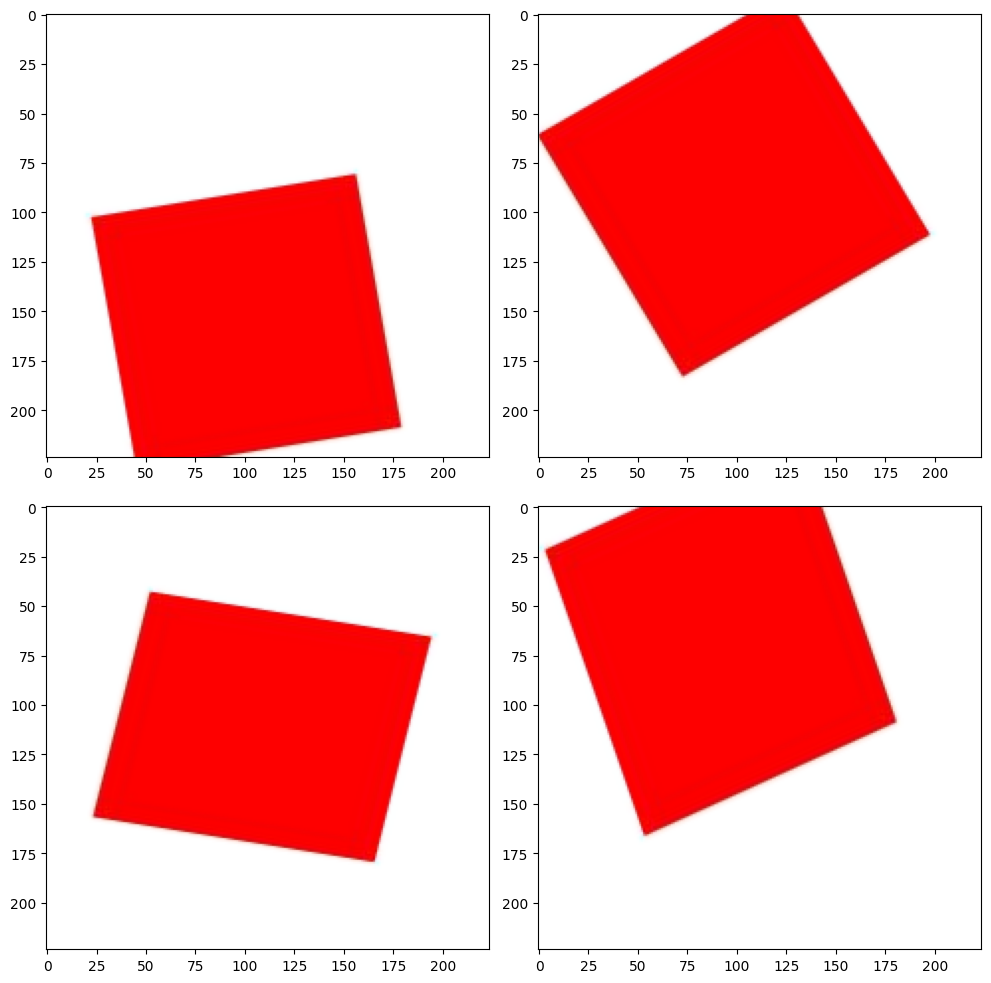

In [3]:
# Define o caminho do arquivo da imagem
img_path = 'sample.jpg'

# Carrega a imagem salva no formato compatível com o Keras
img = load_img(img_path)

# Converte a imagem carregada em um array NumPy
x = img_to_array(img)

# Expande as dimensões do array para adicionar um eixo extra na posição 0,
# transformando a imagem de formato (altura, largura, canais) para (1, altura, largura, canais).
# Isso é necessário para alimentar modelos de deep learning que esperam lotes (batches) de imagens.
x = np.expand_dims(x, axis=0)

# Cria um gerador de imagens para aplicar técnicas de aumento de dados (data augmentation)
datagen = ImageDataGenerator(
    rotation_range=40,        # Rotação aleatória de até 40 graus
    width_shift_range=0.2,    # Deslocamento horizontal de até 20% da largura da imagem
    height_shift_range=0.2,   # Deslocamento vertical de até 20% da altura da imagem
    shear_range=0.2,          # Transformação de cisalhamento (shear) de até 20%
    zoom_range=0.2,           # Zoom aleatório de até 20%
    horizontal_flip=True,     # Espelhamento horizontal aleatório
    fill_mode='nearest'       # Define a forma de preenchimento dos pixels gerados após transformações
)

# Inicializa uma figura para exibir as imagens em uma grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Inicializa um contador para controlar a quantidade de imagens geradas
i = 0

# Gera imagens aumentadas iterativamente usando o gerador de dados
for batch in datagen.flow(x, batch_size=1):
    ax = axes[i // 2, i % 2]  # Seleciona a posição correta na grade 2x2
    ax.imshow(batch[0].astype('uint8'))  # Converte a imagem para uint8 e exibe
    # ax.axis('off')  # Remove os eixos para uma visualização limpa
    i += 1
    if i % 4 == 0:  # Para a geração após exibir 4 imagens transformadas
        break

# Exibe todas as imagens geradas
plt.tight_layout()
plt.show()

## **Etapa 2: Normalização por Característica e por Amostra**
Nesta etapa, aplicaremos técnicas de normalização de dados para padronizar os valores dos _pixels_ das imagens, tornando o treinamento do modelo mais estável e eficiente.

A normalização melhora o desempenho da rede neural ao ajustar os dados para uma escala uniforme, reduzindo discrepâncias entre diferentes imagens.

Utilizaremos duas abordagens principais de normalização com `ImageDataGenerator`:

### **Normalização por Característica** (_Feature-wise Normalization_)

Centraliza os valores dos pixels considerando todo o conjunto de dados.
* `featurewise_center=True`: Subtrai a média global do conjunto de imagens.
* `featurewise_std_normalization=True`: Divide os valores dos pixels pelo desvio padrão global, garantindo que os dados tenham distribuição normalizada.

### **Normalização por Amostra** (_Sample-wise Normalization_)

Ajusta cada imagem individualmente, sem considerar as demais.
* `samplewise_center=True`: Subtrai a média dos pixels de cada imagem.
* `samplewise_std_normalization=True`: Normaliza cada imagem com base no seu próprio desvio padrão.

Essas técnicas ajudam a acelerar a convergência do modelo durante o treinamento e podem melhorar a precisão da rede neural ao tornar os dados mais homogêneos.

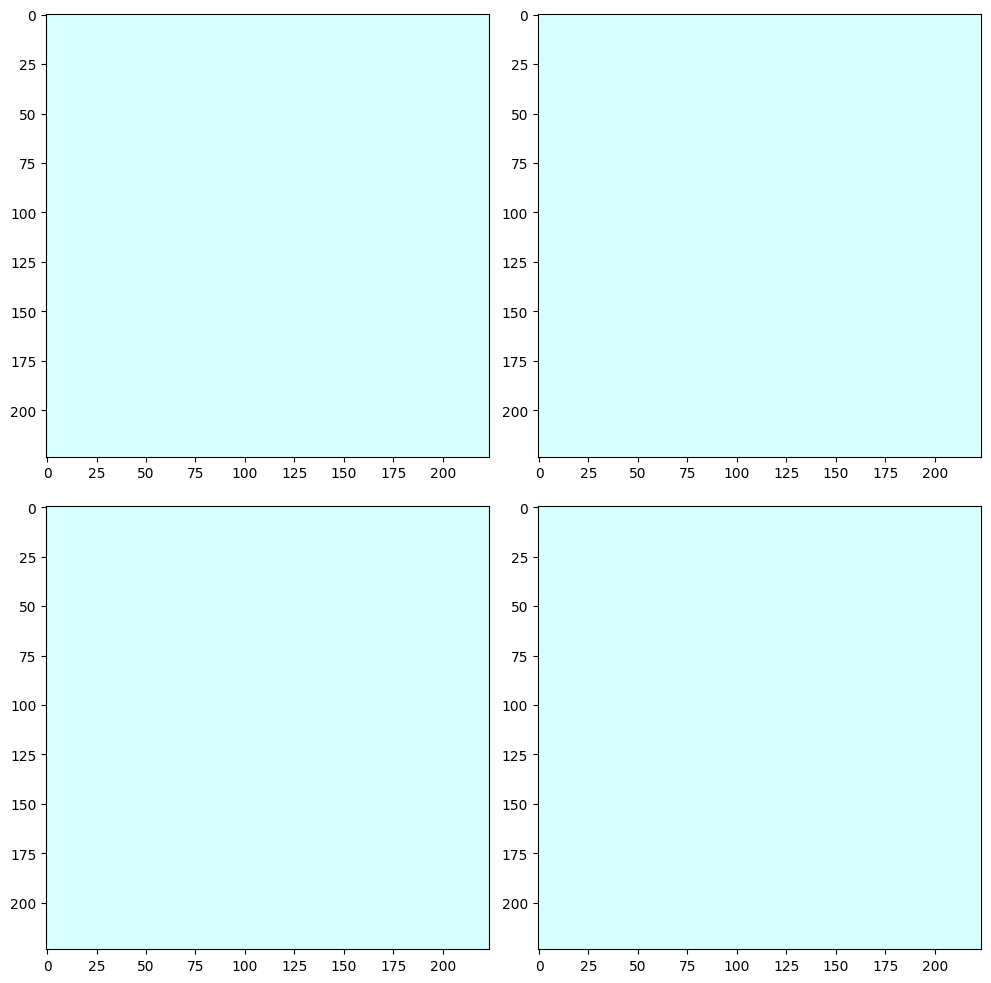

In [4]:
# Cria um gerador de aumento de dados com normalização de características
datagen = ImageDataGenerator(
    featurewise_center=True,           # Centraliza os valores dos pixels subtraindo a média do conjunto de dados
    featurewise_std_normalization=True, # Normaliza os valores dos pixels dividindo pelo desvio padrão do conjunto de dados
    samplewise_center=True,             # Centraliza cada amostra subtraindo sua própria média
    samplewise_std_normalization=True   # Normaliza cada amostra dividindo pelo seu próprio desvio padrão
)

# Ajusta o gerador de dados ao conjunto de imagens para calcular a média e o desvio padrão
datagen.fit(x)

# Inicializa uma figura para exibir as imagens em uma grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Inicializa um contador para controlar a exibição das imagens
i = 0

# Gera imagens aumentadas iterativamente usando o gerador de dados
for batch in datagen.flow(x, batch_size=1):
    ax = axes[i // 2, i % 2]  # Seleciona a posição correta na grade 2x2
    ax.imshow(batch[0].astype('uint8'))  # Converte a imagem para uint8 e exibe
    # ax.axis('off')  # Remove os eixos para uma visualização limpa
    i += 1
    if i % 4 == 0:  # Para a geração após exibir 4 imagens transformadas
        break

# Exibe as imagens
plt.tight_layout()
plt.show()

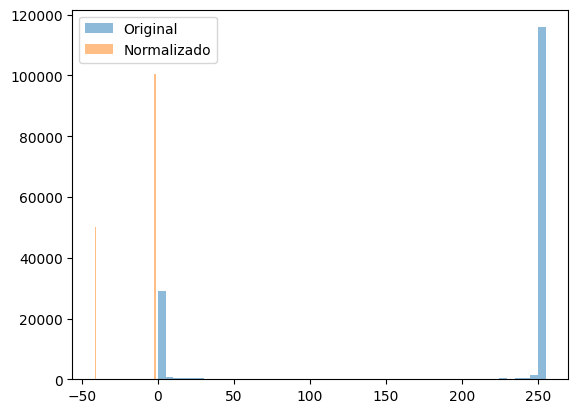

In [5]:
plt.hist(x.flatten(), bins=50, alpha=0.5, label='Original')
plt.hist(datagen.flow(x, batch_size=1)[0].flatten(), bins=50, alpha=0.5, label='Normalizado')
plt.legend()
plt.show()

## **Etapa 3: Implementação de uma Função Personalizada para Aumento de Dados**

Nesta etapa, será definida e aplicada uma função personalizada de aumento de dados que adiciona ruído aleatório às imagens. Essa técnica aumenta a diversidade do conjunto de treinamento, tornando o modelo mais resistente a variações e ruídos nos dados reais, o que melhora sua capacidade de generalização.

A função personalizada será integrada ao `ImageDataGenerator` por meio do parâmetro `preprocessing_function`, garantindo que cada imagem passe por esse processamento antes de ser usada no treinamento.

**Passos para Adicionar Ruído Aleatório**

1. **Definir a função de ruído**

  A função criará um ruído gaussiano com distribuição normal (`np.random.normal`). O ruído será adicionado diretamente aos valores dos pixels da imagem, simulando imperfeições naturais.
  
2. **Aplicar a função no `ImageDataGenerator`**

  A função será vinculada ao `ImageDataGenerator` por meio do parâmetro `preprocessing_function`.
  Cada imagem carregada passará por essa transformação antes de ser usada pelo modelo.

Essa abordagem é útil para treinar redes neurais mais robustas, pois permite que o modelo aprenda a ignorar pequenas perturbações e se concentre nas características essenciais das imagens.

In [6]:
def add_random_noise(image, noise_intensity=0.1):
    """
    Adiciona ruído gaussiano à imagem.

    Parâmetros:
    image (numpy array): Imagem de entrada no formato de array NumPy.
    noise_intensity (float): Intensidade do ruído (desvio padrão da distribuição normal).

    Retorno:
    numpy array: Imagem com ruído adicionado, no intervalo [0, 255].
    """
    # Normaliza a imagem para o intervalo [0, 1] se necessário
    if image.max() > 1.0:
        image = image / 255.0

    # Gera ruído gaussiano
    noise = np.random.normal(0, noise_intensity, image.shape)

    # Adiciona o ruído e garante que os valores permaneçam no intervalo [0, 1]
    noisy_image = np.clip(image + noise, 0, 1)

    # Retorna a imagem no intervalo [0, 255]
    return (noisy_image * 255).astype('uint8')

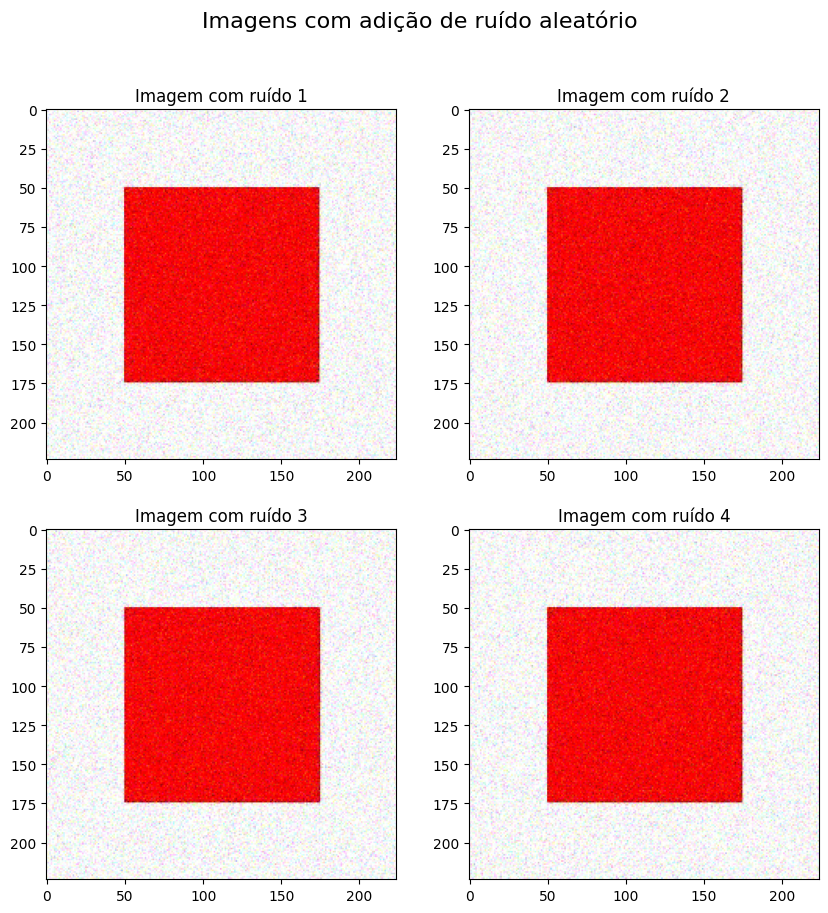

In [13]:
# Cria um gerador de aumento de dados aplicando a função personalizada de ruído
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Inicializa uma figura para exibir as imagens em uma grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Imagens com adição de ruído aleatório', fontsize=16)

# Inicializa um contador para controlar a exibição das imagens
i = 0

# Gera imagens aumentadas iterativamente usando o gerador de dados
for batch in datagen.flow(x, batch_size=1):
    ax = axes[i // 2, i % 2]  # Seleciona a posição correta na grade 2x2
    ax.imshow(batch[0].astype('uint8'))  # Converte a imagem para uint8 e exibe
    # ax.axis('off')  # Remove os eixos para uma visualização limpa
    ax.set_title(f'Imagem com ruído {i+1}')  # Adiciona um título à imagem
    i += 1
    if i % 4 == 0:  # Para a geração após exibir 4 imagens transformadas
        break

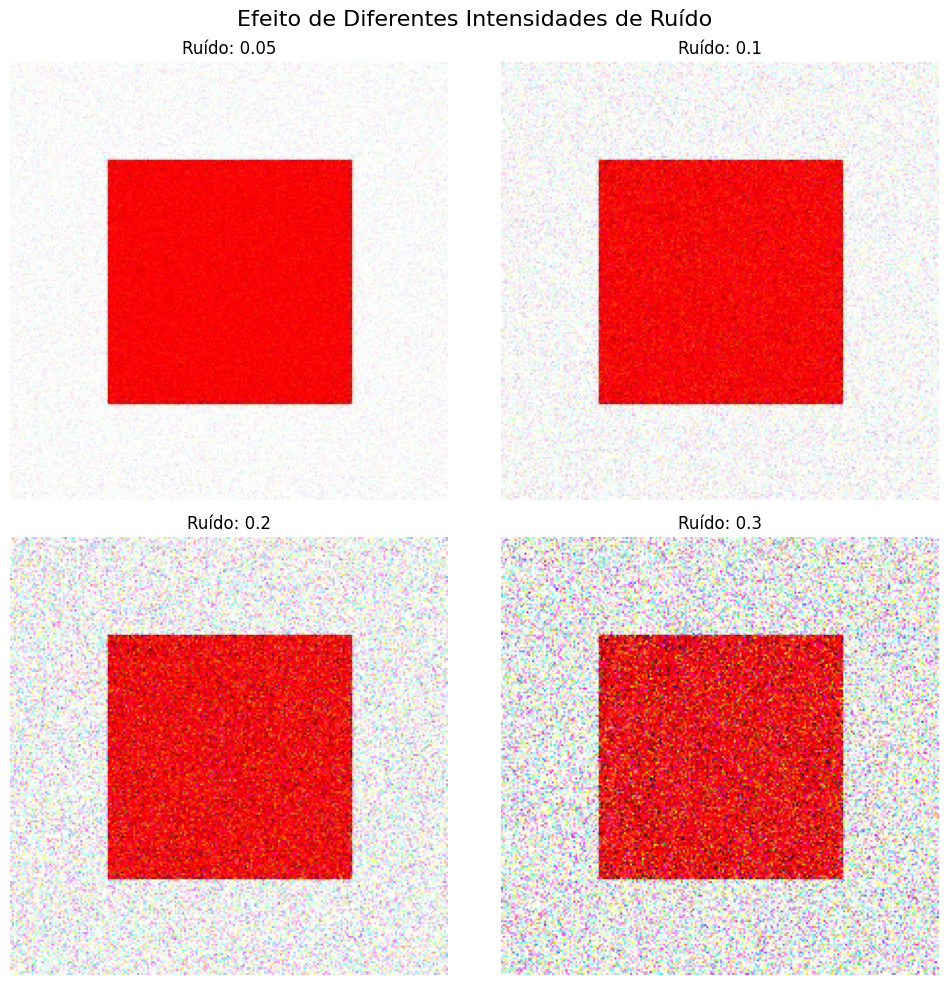

In [10]:
# Apresenta diferentes intensidades de ruído
noise_intensities = [0.05, 0.1, 0.2, 0.3]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Efeito de Diferentes Intensidades de Ruído', fontsize=16)

for idx, intensity in enumerate(noise_intensities):
    noisy_image = add_random_noise(x[0], intensity)
    ax = axes[idx // 2, idx % 2]
    ax.imshow(noisy_image.astype('uint8'))
    ax.axis('off')
    ax.set_title(f'Ruído: {intensity}')

plt.tight_layout()
plt.show()

### **Aplicação do aumento de dados com múltiplas transformações**

---



In [8]:
# Cria um gerador de aumento de dados com múltiplas transformações
datagen = ImageDataGenerator(
    preprocessing_function=add_random_noise,  # Adiciona ruído
    rotation_range=40,                       # Rotação aleatória de até 40 graus
    width_shift_range=0.2,                   # Deslocamento horizontal de até 20%
    height_shift_range=0.2,                  # Deslocamento vertical de até 20%
    shear_range=0.2,                         # Cisalhamento de até 20%
    zoom_range=0.2,                          # Zoom aleatório de até 20%
    horizontal_flip=True,                    # Espelhamento horizontal
    fill_mode='nearest'                      # Preenchimento de pixels após transformações
)

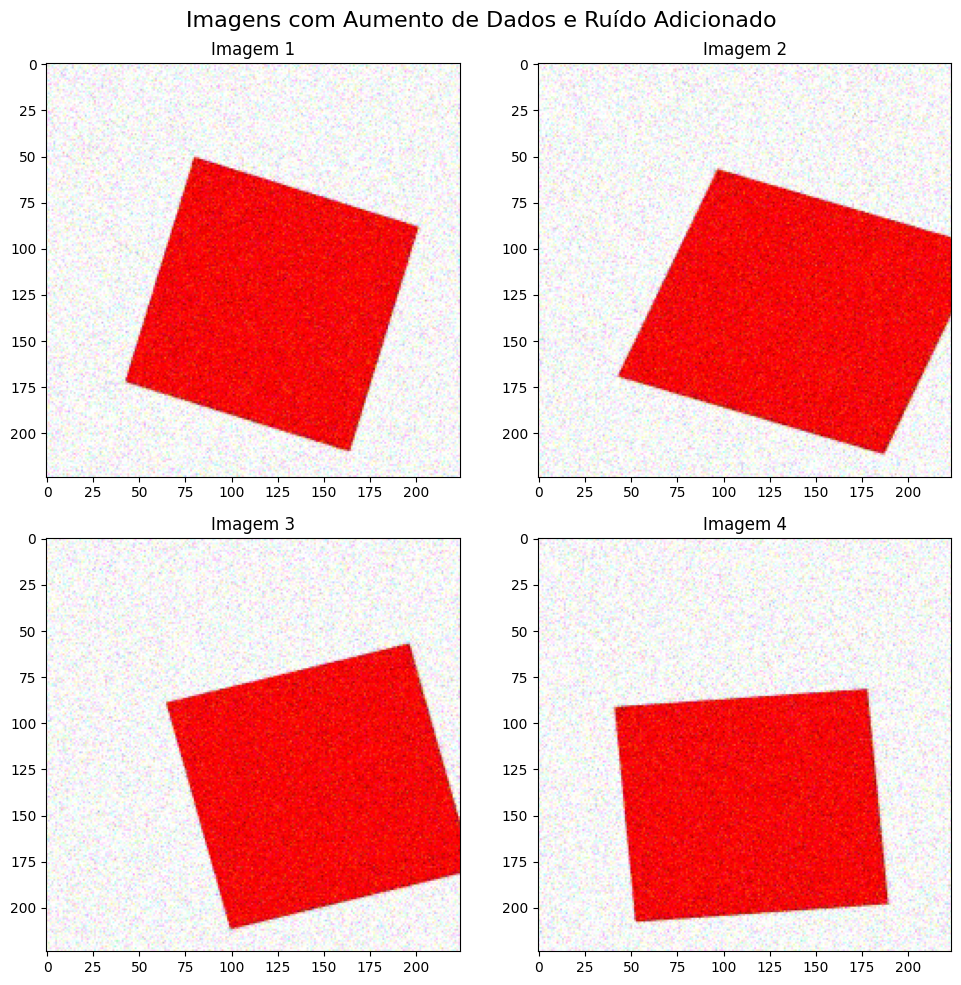

In [9]:
# Inicializa uma figura para exibir as imagens em uma grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Imagens com Aumento de Dados e Ruído Adicionado', fontsize=16)

# Inicializa um contador para controlar a exibição das imagens
i = 0

# Gera imagens aumentadas iterativamente usando o gerador de dados
for batch in datagen.flow(x, batch_size=1):
    ax = axes[i // 2, i % 2]  # Seleciona a posição correta na grade 2x2
    ax.imshow(batch[0].astype('uint8'))  # Converte a imagem para uint8 e exibe
    ax.axis('on')  # Configuração para eixos
    ax.set_title(f'Imagem {i+1}')  # Adiciona um título à imagem
    i += 1
    if i >= 4:  # Para a geração após exibir 4 imagens transformadas
        break

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

## **Etapa 4: Visualização das Imagens Aumentadas**

---

Nesta etapa, será realizada a visualização das imagens transformadas para analisar o impacto de cada técnica de aumento de dados aplicada. A observação das imagens aumentadas é fundamental para garantir que as transformações preservem as características relevantes dos dados, sem distorcer excessivamente os padrões essenciais para o aprendizado do modelo.

### **Objetivo da Visualização**
1. **Avaliar a diversidade dos dados gerados**: verificar se as transformações criam variações significativas sem comprometer a identidade dos objetos na imagem.
2. **Garantir que o aumento de dados seja realista**: algumas técnicas podem alterar excessivamente a estrutura da imagem, tornando-a irreconhecível para o modelo.

3. **Ajustar parâmetros de `ImageDataGenerator`** (se necessário): caso algumas transformações não sejam adequadas, os valores de rotação, deslocamento, cisalhamento e zoom podem ser ajustados.

### **Passos para Visualizar as Imagens Aumentadas**
* Gerar um conjunto de imagens transformadas usando o `ImageDataGenerator`.
* Exibir as imagens lado a lado para facilitar a comparação entre os diferentes aumentos aplicados.
* Observar as diferenças causadas por cada técnica, como rotação, espelhamento, deslocamento e ruído.
Ao visualizar as imagens aumentadas, é possível validar se o **data augmentation** está contribuindo positivamente para o treinamento do modelo, garantindo maior robustez e generalização.

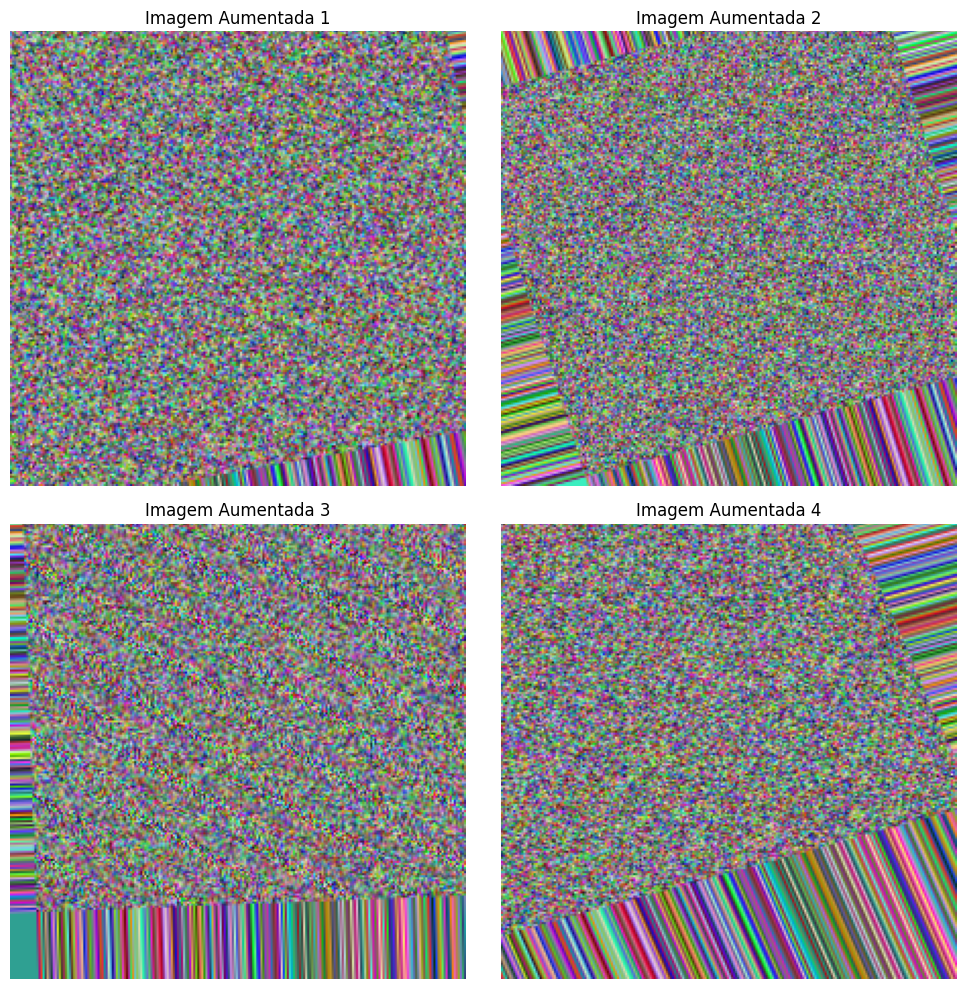

In [15]:
# Configura o gerador de aumento de dados (data augmentation)
datagen = ImageDataGenerator(
    rotation_range=40,           # Rotação aleatória de até 40 graus
    width_shift_range=0.2,       # Translação horizontal de até 20% da largura
    height_shift_range=0.2,      # Translação vertical de até 20% da altura
    shear_range=0.2,             # Cisalhamento de até 20%
    zoom_range=0.2,              # Zoom aleatório de até 20%
    horizontal_flip=True,        # Espelhamento horizontal aleatório
    fill_mode='nearest'          # Preenche pixels criados pelas transformações
)

# Função para exibir imagens aumentadas
def plot_enlarged_images(x, datagen, num_imagens=4):
    """
    Gera e exibe imagens aumentadas a partir de um conjunto de imagens de entrada.

    Args:
        x (np.array): Um array NumPy contendo as imagens de entrada.
        datagen (ImageDataGenerator): Um gerador de aumento de dados configurado.
        num_imagens (int): Número de imagens aumentadas a serem exibidas. Default é 4.
    """
    plt.figure(figsize=(10, 10))  # Configura o tamanho da figura

    # Itera sobre as imagens geradas pelo datagen
    for i, batch in enumerate(datagen.flow(x, batch_size=1)):
        if i >= num_imagens:  # Interrompe após gerar o número desejado de imagens
            break

        # Exibe a imagem aumentada
        plt.subplot(2, 2, i + 1)  # Cria uma subfigura na grade 2x2
        plt.imshow(batch[0].astype('uint8'))  # Converte e exibe a imagem
        plt.title(f'Imagem Aumentada {i + 1}')  # Adiciona um título
        plt.axis('off')  # Remove os eixos da imagem

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()  # Exibe a figura

# Exemplo de uso
if __name__ == "__main__":
    # Exemplo de imagens de entrada (substitua por suas imagens reais)
    x = np.random.randint(0, 256, size=(1, 224, 224, 3), dtype='uint8')  # 1 imagem de 224x224 com 3 canais (RGB)

    # Exibe 4 imagens aumentadas
    plot_enlarged_images(x, datagen, num_imagens=4)

## **Referências**

  GÉRON, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.", 2023.